## **Sentiment Analysis: News Articles**

In [65]:
import pandas as pd

df = pd.read_csv(r'C:\Users\jbhan\Desktop\StockMarketNewsImpact\combined_news_with_bodies_with_sentiment.csv')

df.head()

,Stocks,Timestamp,Title,Body,Source,sentiment_label,sentiment_score,positive_score,negative_score,neutral_score
0,['AMZN'],2021-01-02 13:28:07+00:00,"Will Shopify Stock Reach $2,000 By 2022?","Every week, Benzinga conducts a sentiment surv...",benzinga.com,negative,-0.848325,0.040885,0.889210,0.069906
1,"['AAPL', 'TSLA']",2021-01-02 16:25:30+00:00,Benzinga's Final Bulls And Bears Of The Year: ...,The final trading week of a tumultuous year of...,benzinga.com,positive,0.514796,0.538463,0.023666,0.437871
2,['TSLA'],2021-01-03 13:12:08+00:00,Nio's Record Run Continues as Deliveries Spike...,Chinese EV maker Nio Inc – ADR NIO announced r...,benzinga.com,positive,0.933630,0.947443,0.013813,0.038744
3,['TSLA'],2021-01-03 15:45:16+00:00,Nio Launches 'NIO Certified' Used Car Service ...,In line with its emphasis on service and suppo...,benzinga.com,positive,0.380453,0.391370,0.010917,0.597713
4,"['MSFT', 'AAPL', 'AMZN', 'TSLA']",2021-01-03 16:06:22+00:00,"Will Tesla, Apple and Amazon Help The QQQ ETF ...","Every week, Benzinga conducts a sentiment surv...",benzinga.com,positive,0.534825,0.548430,0.013605,0.437965


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Load and clean data
news_df = pd.read_csv('combined_news_with_bodies_with_sentiment.csv')
news_df['Timestamp'] = pd.to_datetime(news_df['Timestamp'])

# Clean up stock symbols and filter for single stocks only
news_df['Stocks'] = news_df['Stocks'].str.strip("[]'").str.replace("'", "")
news_df = news_df[news_df['Stocks'].isin(companies)]  # Keep only single stock entries

print("Dataset Overview:")
print(f"Total number of articles: {len(df)}")
print("\nArticles per company:")
print(df['Stocks'].value_counts())
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts(normalize=True).round(3) * 100, "%")

Dataset Overview:
Total number of articles: 50383

Articles per company:
Stocks
['TSLA']                                                     8209
['GOOGL']                                                    6757
['AMZN']                                                     6331
['AAPL']                                                     5812
['NVDA']                                                     5770
                                                             ... 
['NVDA', 'MSFT', 'META', 'GOOGL', 'AAPL']                       1
['MSFT', 'GOOGL', 'META', 'AAPL', 'AMZN']                       1
['AAPL', 'AMZN', 'MSFT', 'META', 'GOOGL', 'NVDA', 'TSLA']       1
['NVDA', 'MSFT', 'GOOGL', 'TSLA', 'AAPL', 'META']               1
['MSFT', 'GOOGL', 'AMZN', 'AAPL', 'TSLA', 'META']               1
Name: count, Length: 1309, dtype: int64

Sentiment Distribution:
sentiment_label
neutral     53.5
positive    26.8
negative    19.7
Name: proportion, dtype: float64 %


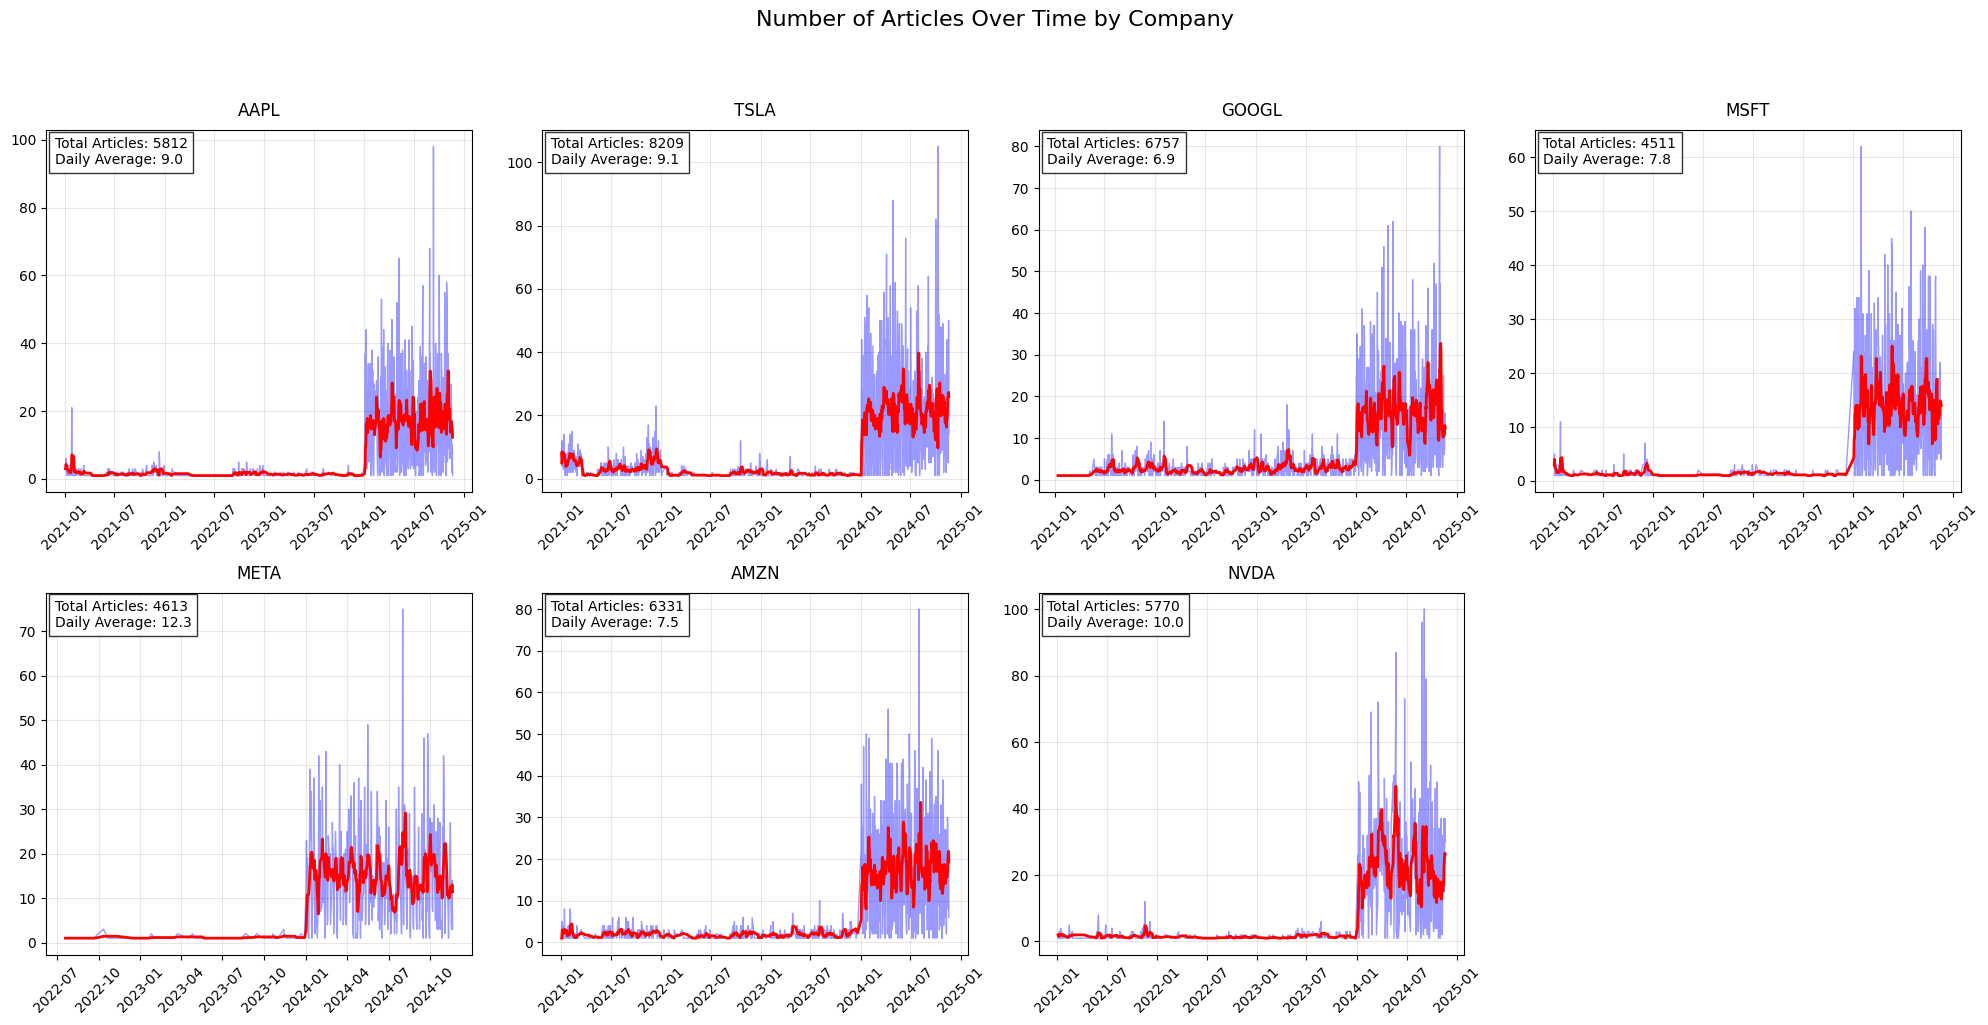


Article Count Summary by Company:

AAPL:
Total articles: 5812
Days with articles: 649
Average articles per day: 8.96

TSLA:
Total articles: 8209
Days with articles: 903
Average articles per day: 9.09

GOOGL:
Total articles: 6757
Days with articles: 976
Average articles per day: 6.92

MSFT:
Total articles: 4511
Days with articles: 578
Average articles per day: 7.80

META:
Total articles: 4613
Days with articles: 374
Average articles per day: 12.33

AMZN:
Total articles: 6331
Days with articles: 847
Average articles per day: 7.47

NVDA:
Total articles: 5770
Days with articles: 577
Average articles per day: 10.00


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']


news_df['Timestamp'] = pd.to_datetime(news_df['Timestamp'])

# Clean up stock symbols and filter for single stocks only
news_df['Stocks'] = news_df['Stocks'].str.strip("[]'").str.replace("'", "")
news_df = news_df[news_df['Stocks'].isin(companies)]

# Create subplots for each company (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Add title with padding
fig.suptitle('Number of Articles Over Time by Company', 
             fontsize=16, y=1.02)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot for each company
for idx, company in enumerate(companies):
    company_data = news_df[news_df['Stocks'] == company].copy()
    
    # Calculate daily article counts
    company_data['Date'] = company_data['Timestamp'].dt.date
    daily_counts = company_data.groupby('Date').size().reset_index(name='count')
    
    # Create the plot
    ax = axes[idx]
    
    # Plot daily counts
    ax.plot(daily_counts['Date'], daily_counts['count'], 
            color='blue', alpha=0.4, linewidth=1)
    
    # Add 7-day moving average
    rolling_mean = daily_counts['count'].rolling(window=7, min_periods=1).mean()
    ax.plot(daily_counts['Date'], rolling_mean, 
            color='red', linewidth=2, label='7-day moving average')
    
    # Customize the plot
    ax.set_title(f'{company}', fontsize=12, pad=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add total article count as text
    total_articles = len(company_data)
    daily_avg = total_articles / len(daily_counts)
    ax.text(0.02, 0.98, 
            f'Total Articles: {total_articles}\nDaily Average: {daily_avg:.1f}', 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Remove the last subplot
axes[-1].remove()

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9)

plt.show()

# Print summary statistics
print("\nArticle Count Summary by Company:")
print("=" * 80)
for company in companies:
    company_data = news_df[news_df['Stocks'] == company]
    total_articles = len(company_data)
    days_with_articles = company_data['Timestamp'].dt.date.nunique()
    print(f"\n{company}:")
    print(f"Total articles: {total_articles}")
    print(f"Days with articles: {days_with_articles}")
    print(f"Average articles per day: {total_articles/days_with_articles:.2f}")

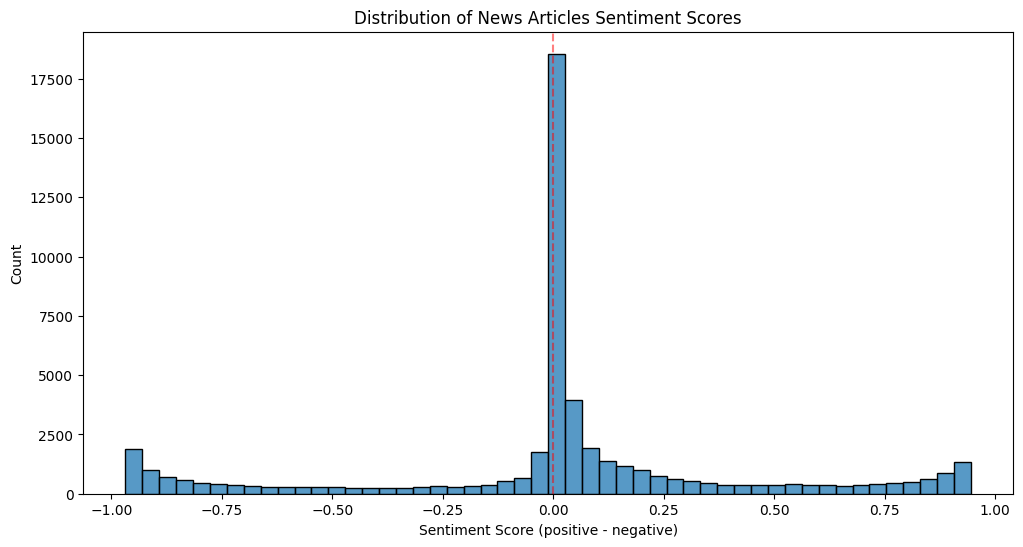


Sentiment Score Summary Statistics:
count    42003.000
mean         0.008
std          0.445
min         -0.968
25%         -0.022
50%          0.009
75%          0.139
max          0.945
Name: sentiment_score, dtype: float64


In [68]:
# Sentiment score distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_score', bins=50)
plt.title('Distribution of News Articles Sentiment Scores')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Sentiment Score (positive - negative)')
plt.ylabel('Count')
plt.show()

print("\nSentiment Score Summary Statistics:")
print(news_df['sentiment_score'].describe().round(3))


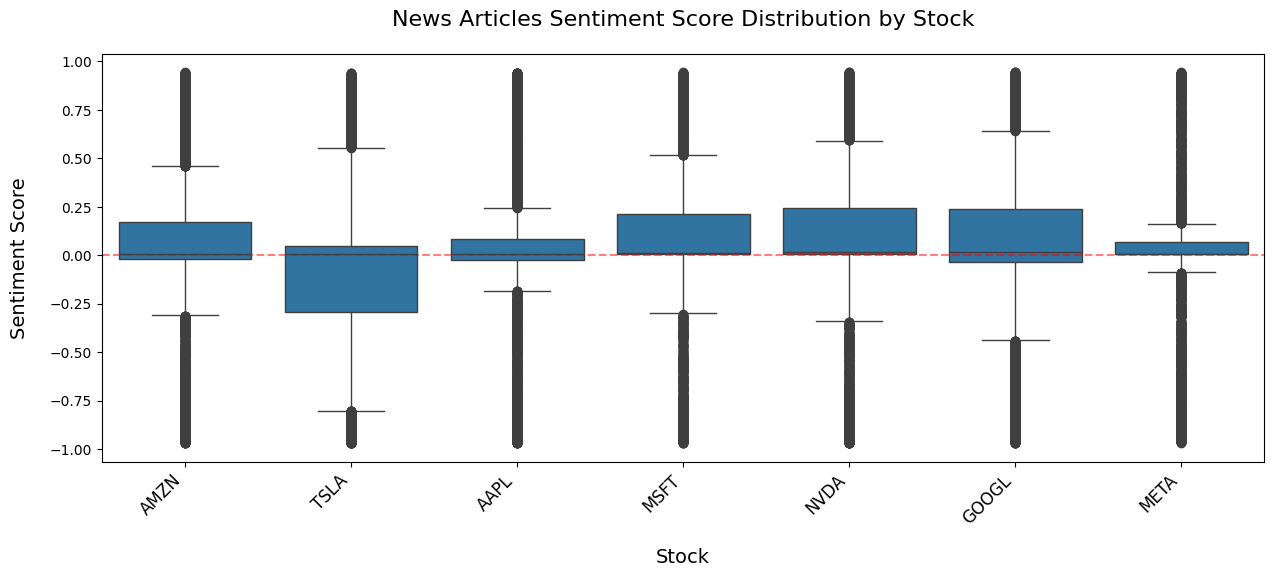


Stock Statistics (sorted by number of articles):


        Average Sentiment  Number of Articles  Standard Deviation
Stocks                                                           
TSLA               -0.103                8209               0.458
GOOGL               0.056                6757               0.469
AMZN                0.031                6331               0.435
AAPL               -0.020                5812               0.430
NVDA                0.063                5770               0.457
META               -0.000                4613               0.392
MSFT                0.075                4511               0.414




In [57]:
# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Clean up stock symbols and filter for single stocks only
news_df['Stocks'] = news_df['Stocks'].str.strip("[]'").str.replace("'", "")
news_df_single_stocks = news_df[news_df['Stocks'].isin(companies)]

# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=news_df_single_stocks, x='Stocks', y='sentiment_score')
plt.title('News Articles Sentiment Score Distribution by Stock', fontsize=16, pad=20)
plt.xlabel('Stock', fontsize=14, labelpad=15)
plt.ylabel('Sentiment Score', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Add more padding around the plot
plt.subplots_adjust(bottom=0.2)

plt.show()

# Calculate and display statistics for single stocks
stock_sentiment = news_df_single_stocks.groupby('Stocks')['sentiment_score'].agg(['mean', 'count', 'std']).round(3)
stock_sentiment = stock_sentiment.rename(columns={
    'mean': 'Average Sentiment',
    'count': 'Number of Articles',
    'std': 'Standard Deviation'
})

print("\nStock Statistics (sorted by number of articles):")
print("=" * 80)
print("\n")
print(stock_sentiment.sort_values('Number of Articles', ascending=False)
      .to_string(float_format=lambda x: '{:>10.3f}'.format(x)))
print("\n")

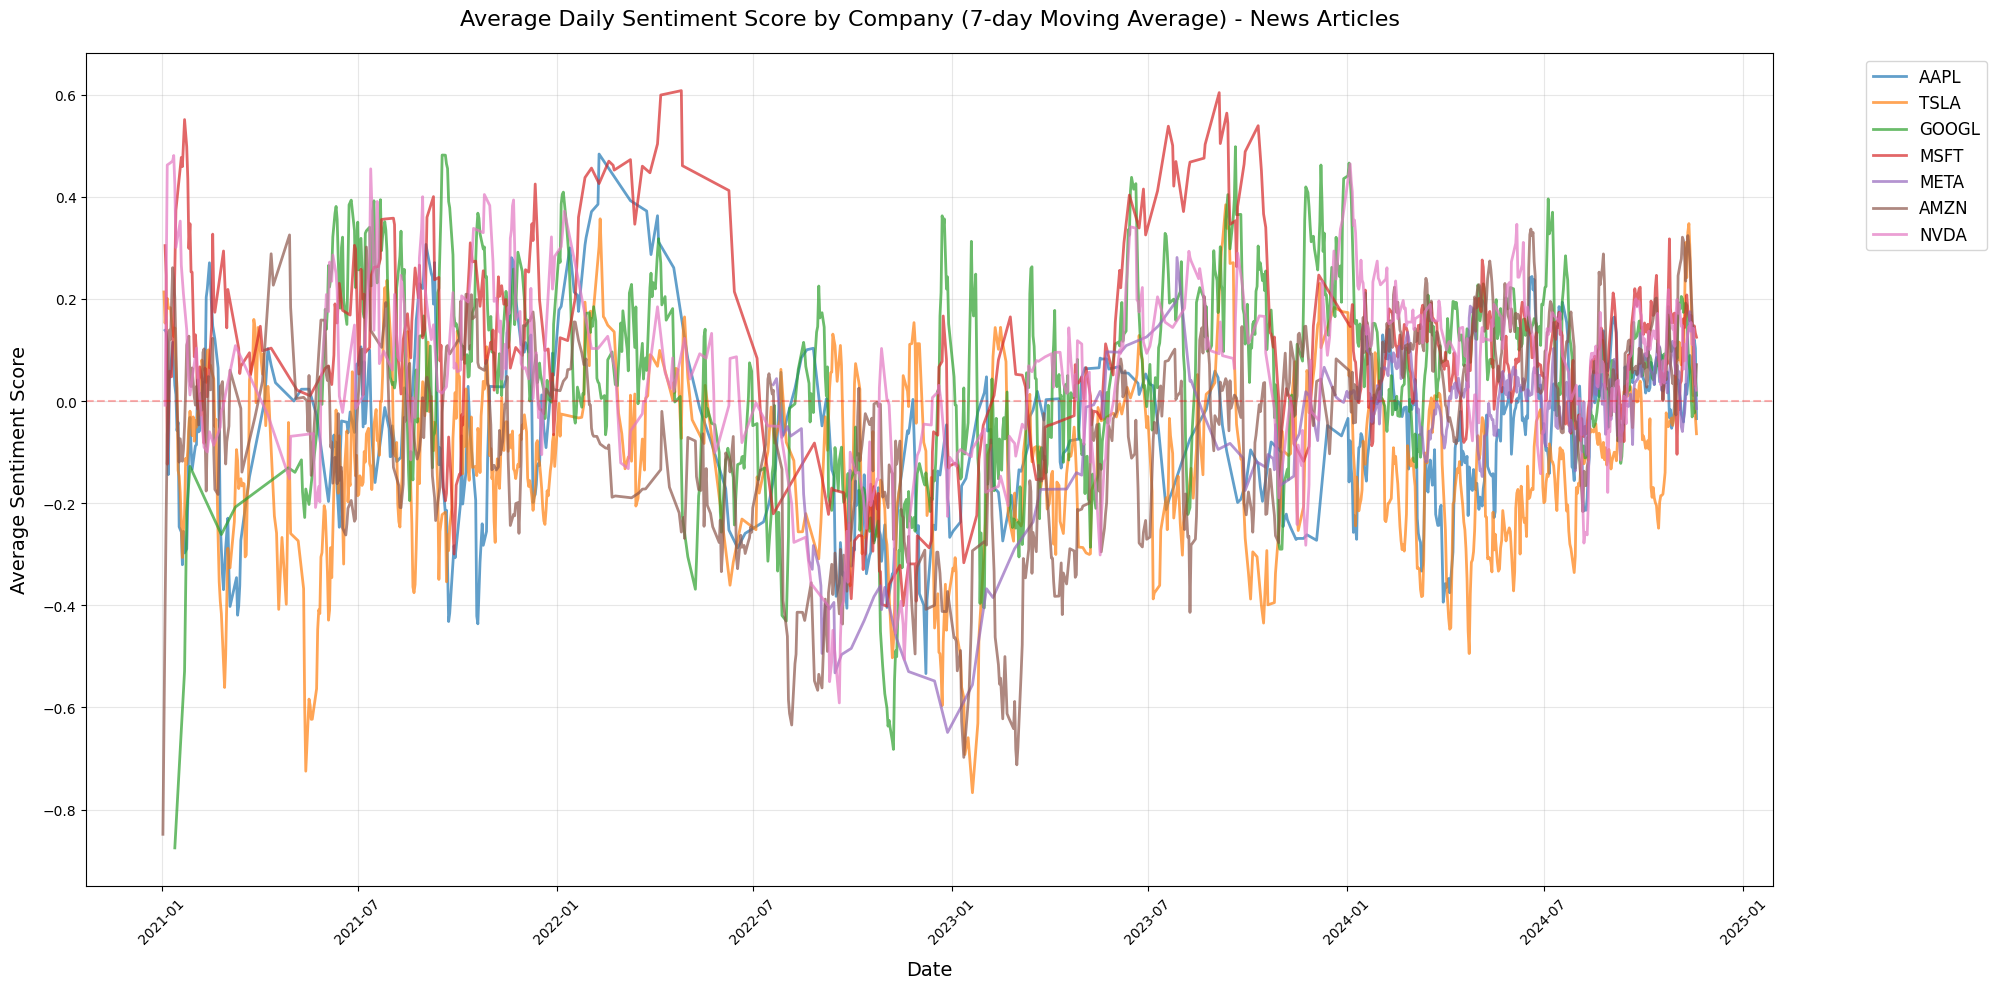


Sentiment Statistics by Company:

AAPL (Total articles: 5812):
count    5812.000
mean       -0.020
std         0.430
min        -0.968
25%        -0.024
50%         0.009
75%         0.084
max         0.943
Name: sentiment_score, dtype: float64

TSLA (Total articles: 8209):
count    8209.000
mean       -0.103
std         0.458
min        -0.968
25%        -0.294
50%         0.009
75%         0.046
max         0.940
Name: sentiment_score, dtype: float64

GOOGL (Total articles: 6757):
count    6757.000
mean        0.056
std         0.469
min        -0.967
25%        -0.034
50%         0.018
75%         0.237
max         0.945
Name: sentiment_score, dtype: float64

MSFT (Total articles: 4511):
count    4511.000
mean        0.075
std         0.414
min        -0.968
25%         0.009
50%         0.011
75%         0.212
max         0.943
Name: sentiment_score, dtype: float64

META (Total articles: 4613):
count    4613.000
mean       -0.000
std         0.392
min        -0.967
25%         0.0

In [58]:
# Define companies to track
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Create separate dataframes for each company
company_dfs = {}
for company in companies:
    # Filter for rows where the company is mentioned (using string contains)
    company_dfs[company] = news_df[news_df['Stocks'].str.contains(company, na=False)].copy()
    company_dfs[company]['Date'] = pd.to_datetime(company_dfs[company]['Timestamp']).dt.date

# Plot sentiment over time for each company
plt.figure(figsize=(20, 10))

# Plot each company's sentiment
for company in companies:
    daily_sentiment = company_dfs[company].groupby('Date')['sentiment_score'].mean()
    # Resample to smooth the lines (7-day moving average)
    daily_sentiment = daily_sentiment.rolling(window=7, min_periods=1).mean()
    plt.plot(daily_sentiment.index, daily_sentiment.values, label=company, linewidth=2, alpha=0.7)

plt.title('Average Daily Sentiment Score by Company (7-day Moving Average) - News Articles', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Average Sentiment Score', fontsize=14, labelpad=10)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print statistics for each company
print("\nSentiment Statistics by Company:")
print("=" * 80)
for company in companies:
    stats = company_dfs[company]['sentiment_score'].describe().round(3)
    count = len(company_dfs[company])
    print(f"\n{company} (Total articles: {count}):")
    print(stats)

<Figure size 2000x1000 with 0 Axes>

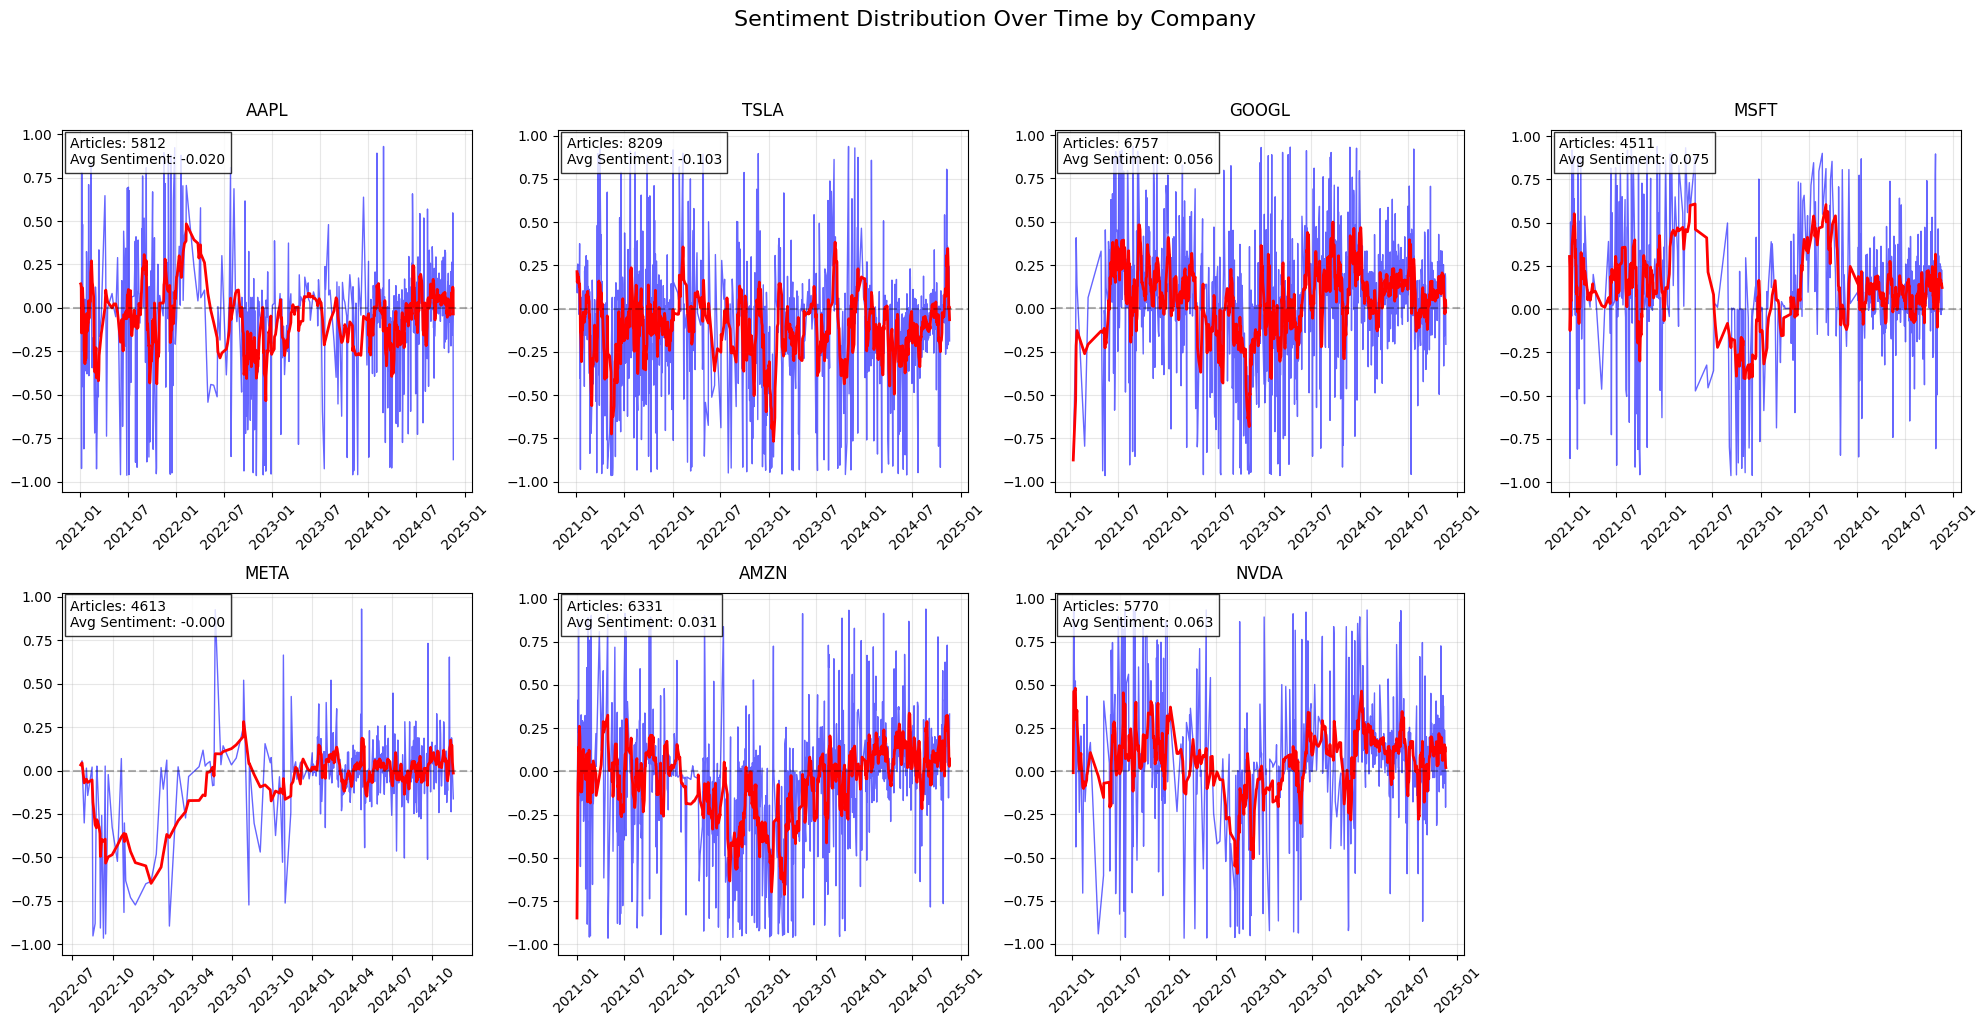


Summary Statistics by Company:

AAPL:
Total articles: 5812
count    5812.000
mean       -0.020
std         0.430
min        -0.968
25%        -0.024
50%         0.009
75%         0.084
max         0.943
Name: sentiment_score, dtype: float64

TSLA:
Total articles: 8209
count    8209.000
mean       -0.103
std         0.458
min        -0.968
25%        -0.294
50%         0.009
75%         0.046
max         0.940
Name: sentiment_score, dtype: float64

GOOGL:
Total articles: 6757
count    6757.000
mean        0.056
std         0.469
min        -0.967
25%        -0.034
50%         0.018
75%         0.237
max         0.945
Name: sentiment_score, dtype: float64

MSFT:
Total articles: 4511
count    4511.000
mean        0.075
std         0.414
min        -0.968
25%         0.009
50%         0.011
75%         0.212
max         0.943
Name: sentiment_score, dtype: float64

META:
Total articles: 4613
count    4613.000
mean       -0.000
std         0.392
min        -0.967
25%         0.006
50%      

In [59]:
# Time series plot for each company
plt.figure(figsize=(20, 10))

# Create subplots for each company (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Add title with padding
fig.suptitle('Sentiment Distribution Over Time by Company', 
             fontsize=16, y=1.02)  # Moved title up

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot for each company
for idx, company in enumerate(companies):
    company_data = news_df[news_df['Stocks'] == company].copy()
    
    # Calculate daily average sentiment
    company_data['Date'] = company_data['Timestamp'].dt.date
    daily_sentiment = company_data.groupby('Date')['sentiment_score'].agg(['mean', 'count']).reset_index()
    
    # Create the plot
    ax = axes[idx]
    
    # Plot sentiment scores
    ax.plot(daily_sentiment['Date'], daily_sentiment['mean'], 
            color='blue', alpha=0.6, linewidth=1)
    
    # Add 7-day moving average
    rolling_mean = daily_sentiment['mean'].rolling(window=7, min_periods=1).mean()
    ax.plot(daily_sentiment['Date'], rolling_mean, 
            color='red', linewidth=2, label='7-day moving average')
    
    # Customize the plot
    ax.set_title(f'{company}', fontsize=12, pad=10)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add article count as text
    total_articles = len(company_data)
    avg_sentiment = company_data['sentiment_score'].mean()
    ax.text(0.02, 0.98, f'Articles: {total_articles}\nAvg Sentiment: {avg_sentiment:.3f}', 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Remove the last subplot (since we have 7 companies and 8 spots)
axes[-1].remove()

# Adjust layout with extra space for title
plt.tight_layout()
fig.subplots_adjust(top=0.9)  # Make room for title

plt.show()

# Print summary statistics
print("\nSummary Statistics by Company:")
print("=" * 80)
for company in companies:
    company_data = news_df[news_df['Stocks'] == company]
    stats = company_data['sentiment_score'].describe().round(3)
    print(f"\n{company}:")
    print(f"Total articles: {len(company_data)}")
    print(stats)

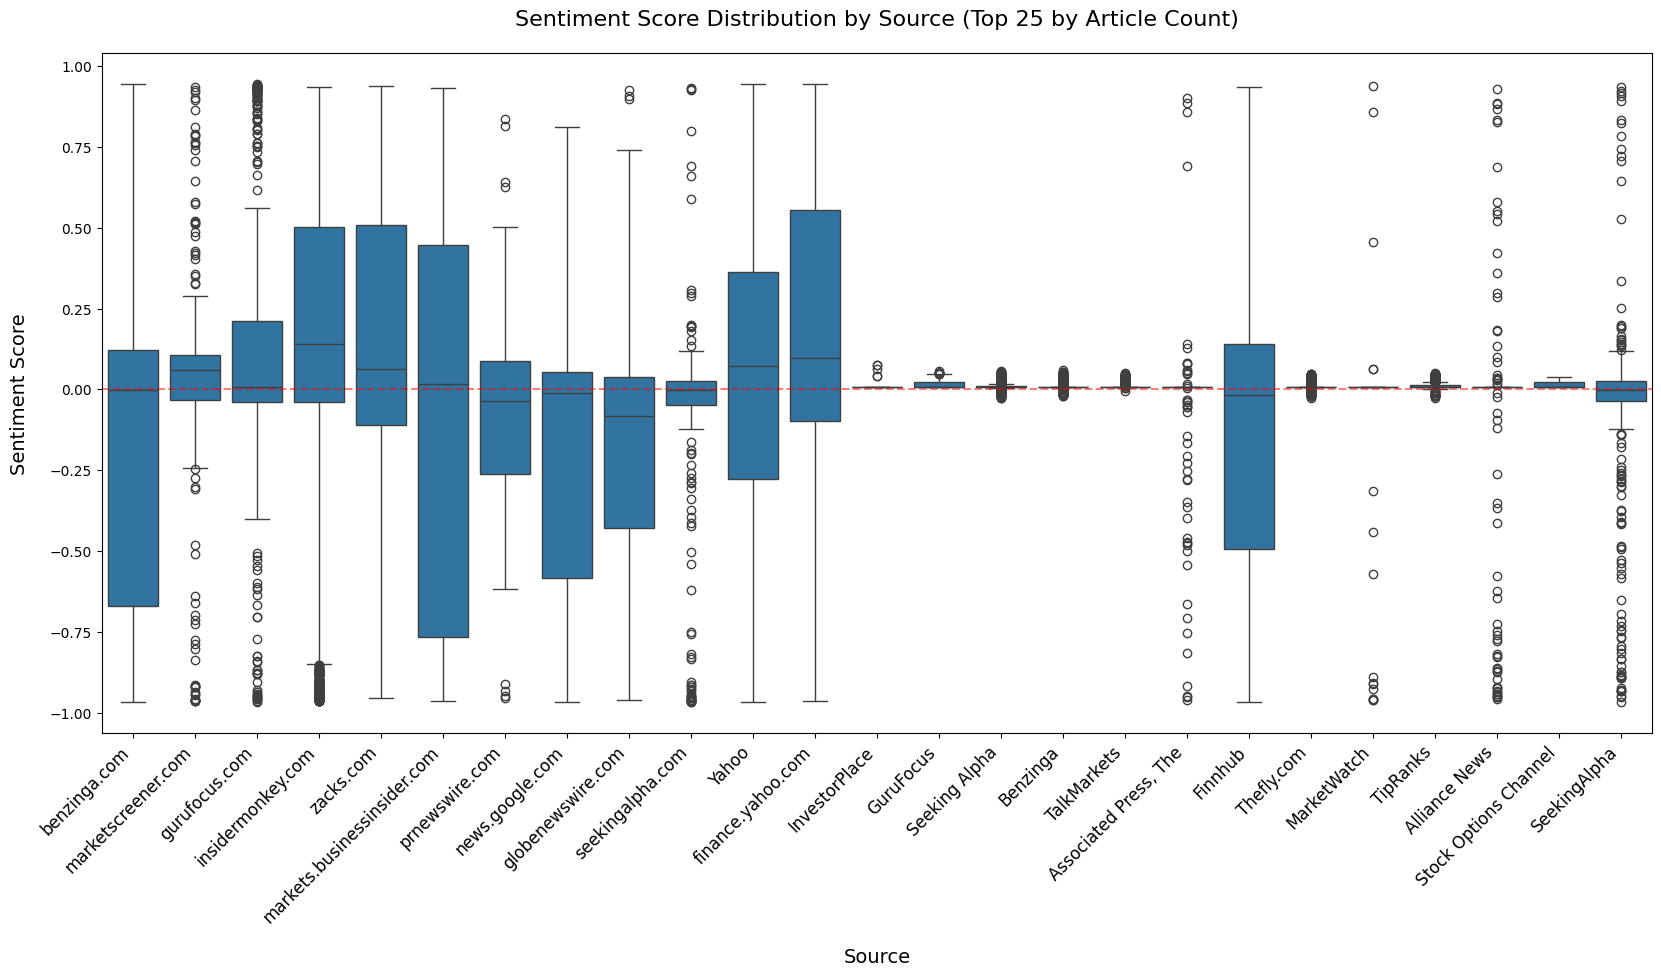



Source Statistics for Top 25 Sources (sorted by average sentiment):


                             Average Sentiment  Number of Articles  Standard Deviation
Source                                                                                
Yahoo                                    0.034               15100               0.542
benzinga.com                            -0.128                3803               0.546
Finnhub                                 -0.096                3058               0.510
Benzinga                                 0.012                2870               0.009
Thefly.com                               0.012                1928               0.010
insidermonkey.com                        0.136                1735               0.505
Seeking Alpha                            0.012                1715               0.010
InvestorPlace                            0.009                1569               0.003
TipRanks                                 0.013            

In [60]:
# Get top 100 sources by count
top_sources = news_df['Source'].value_counts().nlargest(25).index
news_df_top_sources = news_df[news_df['Source'].isin(top_sources)]

# Source analysis with improved spacing and readability
plt.figure(figsize=(20, 10))  # Wider figure

# Create boxplot with increased spacing
ax = sns.boxplot(data=news_df_top_sources, x='Source', y='sentiment_score')

# Customize the plot
plt.title('Sentiment Score Distribution by Source (Top 25 by Article Count)', fontsize=16, pad=20)
plt.xlabel('Source', fontsize=14, labelpad=15)
plt.ylabel('Sentiment Score', fontsize=14, labelpad=15)

# Rotate x-axis labels and adjust their position with more spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Add more padding around the plot
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

# Show plot
plt.show()

# Print source statistics with better formatting and spacing
source_sentiment = news_df_top_sources.groupby('Source')['sentiment_score'].agg(['mean', 'count', 'std']).round(3)
source_sentiment = source_sentiment.rename(columns={
    'mean': 'Average Sentiment',
    'count': 'Number of Articles',
    'std': 'Standard Deviation'
})

print("\n")  # Extra spacing
print("Source Statistics for Top 25 Sources (sorted by average sentiment):")
print("=" * 100)  # Longer separator
print("\n")  # Extra spacing
print(source_sentiment.sort_values('Number of Articles', ascending=False)  # Sort by count instead of sentiment
      .to_string(float_format=lambda x: '{:>10.3f}'.format(x)))  # Right-aligned numbers
print("\n")  # Extra spacing

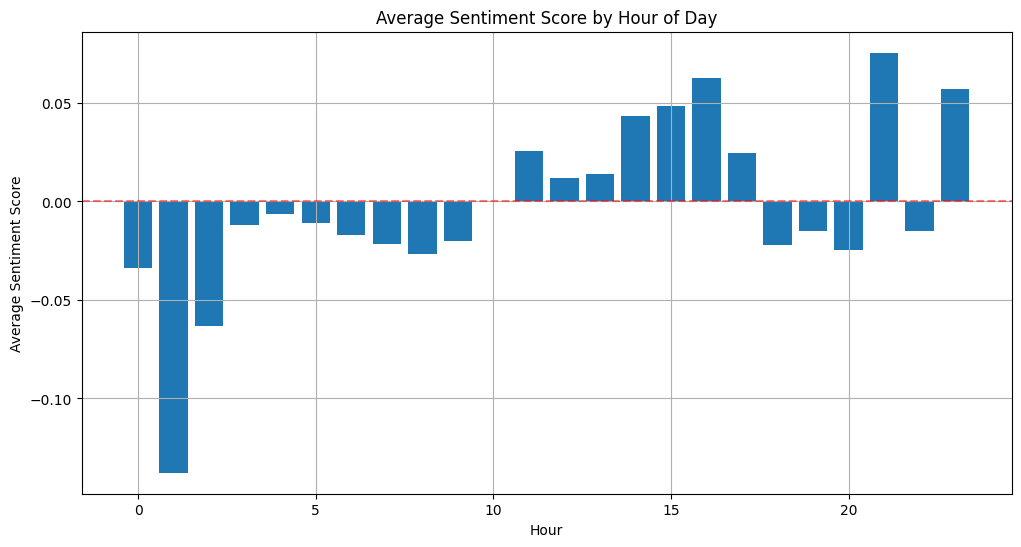


Hourly Statistics:
          mean  count
Hour                 
21    0.075506   1311
16    0.062425   2084
23    0.057014   1025
15    0.048426   2381
14    0.043373   3183
11    0.025715   2945
17    0.024692   1779
13    0.014101   3549
12    0.012002   2971
10    0.000034   2426
4    -0.006529   1217
5    -0.010693   1329
3    -0.011755   1103
19   -0.014789   1430
22   -0.014941   1357
6    -0.016980   1422
9    -0.020225   2113
7    -0.021362   1889
18   -0.022132   1621
20   -0.024615   1251
8    -0.026678   1806
0    -0.033895    574
2    -0.063039    774
1    -0.137724    463


In [61]:
# Time of day analysis
news_df['Hour'] = news_df['Timestamp'].dt.hour
hourly_sentiment = news_df.groupby('Hour')['sentiment_score'].agg(['mean', 'count'])

plt.figure(figsize=(12, 6))
plt.bar(hourly_sentiment.index, hourly_sentiment['mean'])
plt.title('Average Sentiment Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

print("\nHourly Statistics:")
print(hourly_sentiment.sort_values('mean', ascending=False))

## **Sentiment Analysis: Reddit**

In [43]:
import pandas as pd

reddit_df = pd.read_csv(r'C:\Users\jbhan\Desktop\StockMarketNewsImpact\Reddit_2021_to_2024_with_sentiment.csv')

reddit_df.head()

,stock,timestamp,title,body,source,full_text,sentiment_label,sentiment_score,positive_score,negative_score,neutral_score
0,Apple,2023-06-08 19:18:52,📣 Apollo will close down on June 30th. Reddit’...,['I want to thank you for making honestly the ...,reddit,📣 Apollo will close down on June 30th. Reddit’...,negative,-0.100901,0.216493,0.317394,0.466112
1,Apple,2022-02-21 12:12:27,"Thanks, Apple. I’ll let her know.",['--- \n>This is a friendly reminder to [...,reddit,"Thanks, Apple. I’ll let her know. ['--- ...",negative,-0.365893,0.124385,0.490278,0.385337
2,Apple,2023-06-19 19:23:42,"📣 I want to debunk Reddit's claims, and talk a...",['after seeing u/spez in that ama thread i’m n...,reddit,"📣 I want to debunk Reddit's claims, and talk a...",negative,-0.250817,0.188389,0.439206,0.372405
3,Apple,2024-10-29 12:41:35,A tram just derailed and crashed into an Apple...,"['now apple needs to install windows', ""What's...",reddit,A tram just derailed and crashed into an Apple...,negative,-0.554540,0.022762,0.577302,0.399936
4,Apple,2022-03-30 21:31:44,Computer repair shop owner and YouTuber Louis ...,['Always good to see Louis getting positive pr...,reddit,Computer repair shop owner and YouTuber Louis ...,neutral,-0.009387,0.377492,0.386879,0.235630


In [44]:
# how many posts per company?
print("\nPosts per Company (Reddit):")
reddit_df['stock'].value_counts()


Posts per Company (Reddit):


stock
Microsoft    1601
Nvidia       1428
Apple        1400
Tesla        1265
Amazon       1104
Meta         1047
Google        897
Name: count, dtype: int64

In [45]:
print("\nSentiment Score Summary Statistics (Reddit):")
print(reddit_df['sentiment_score'].describe().round(3))


Sentiment Score Summary Statistics (Reddit):
count    8742.000
mean       -0.161
std         0.374
min        -0.935
25%        -0.438
50%        -0.197
75%         0.083
max         0.979
Name: sentiment_score, dtype: float64


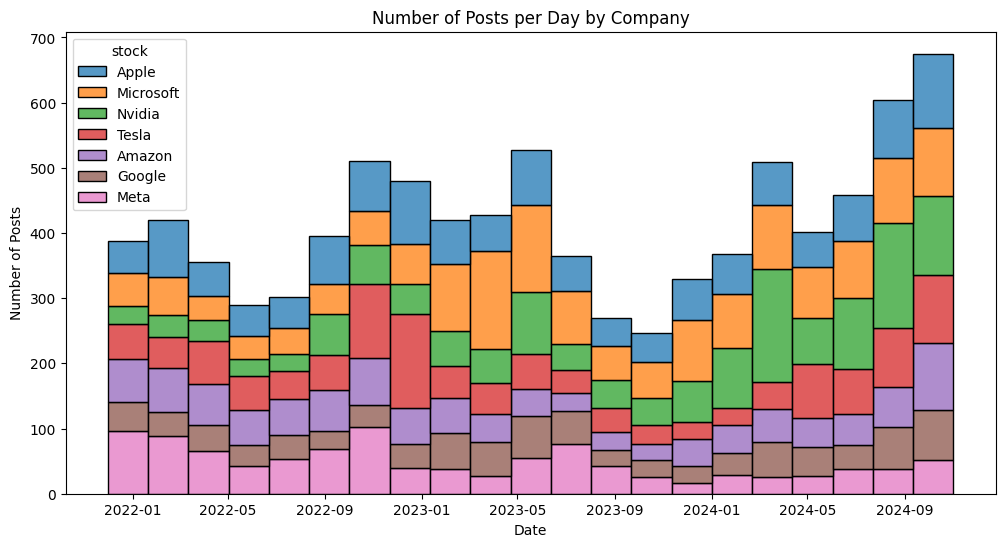

In [46]:
# distribution of time, use timestamp column
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])
reddit_df['timestamp'].value_counts()

# plot over time
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='timestamp', hue='stock', multiple='stack')
plt.title('Number of Posts per Day by Company')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()



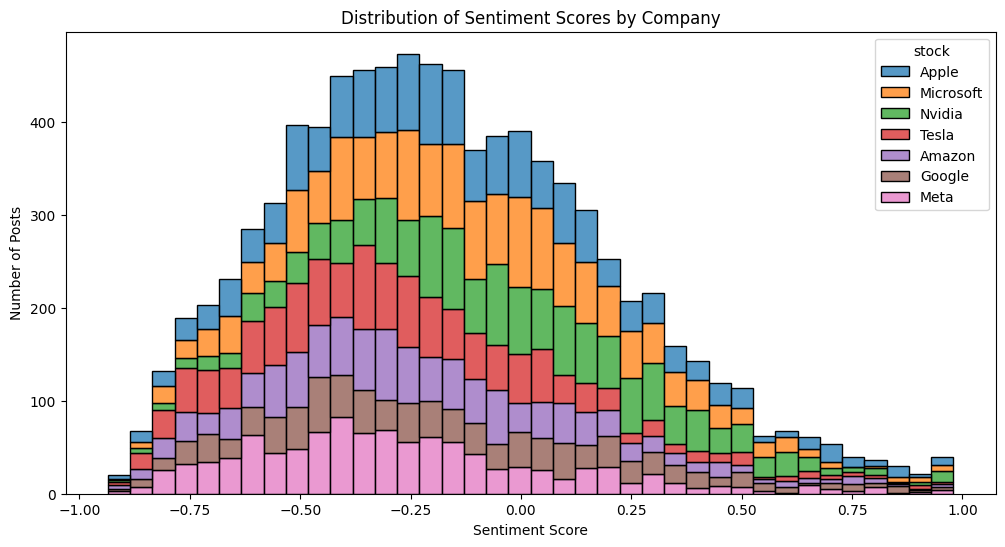

In [47]:
# Distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data=reddit_df, x='sentiment_score', hue='stock', multiple='stack')
plt.title('Distribution of Sentiment Scores by Company')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Posts')
plt.show()


In [49]:
print("\nMean Sentiment Score by Company (Reddit):")
# Mean sentiment score by company
reddit_df.groupby('stock')['sentiment_score'].mean()




Mean Sentiment Score by Company (Reddit):


stock
Amazon      -0.215115
Apple       -0.130485
Google      -0.164840
Meta        -0.265674
Microsoft   -0.117594
Nvidia      -0.023503
Tesla       -0.266876
Name: sentiment_score, dtype: float64

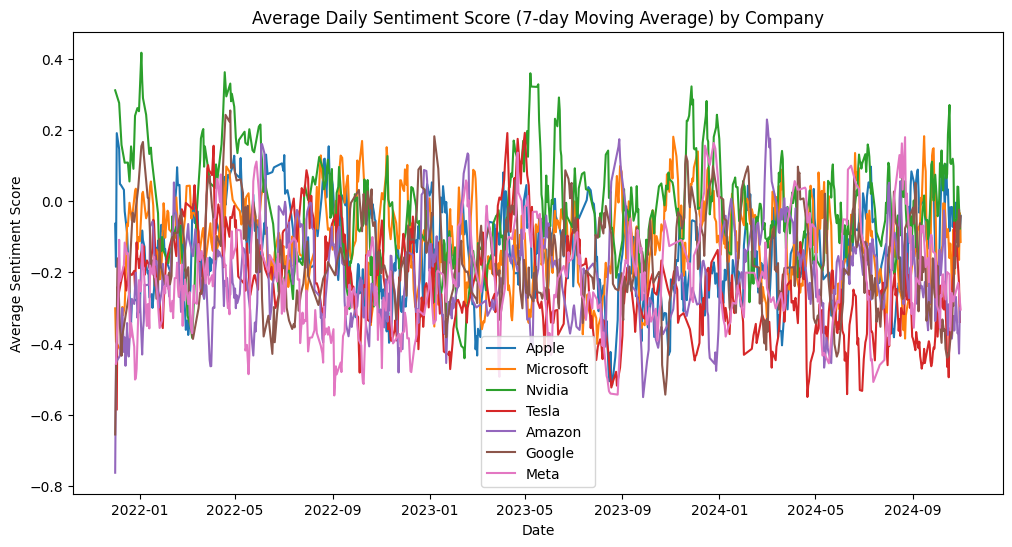

In [50]:
# Average daily sentiment (7-day moving average) for each company
plt.figure(figsize=(12, 6))
for company in reddit_df['stock'].unique():
    # Create explicit copy of the filtered data
    company_data = reddit_df[reddit_df['stock'] == company].copy()
    
    # Now modify the copy
    company_data['date'] = pd.to_datetime(company_data['timestamp']).dt.date
    
    daily_sentiment = company_data.groupby('date')['sentiment_score'].mean()
    daily_sentiment = daily_sentiment.rolling(window=7, min_periods=1).mean()
    plt.plot(daily_sentiment.index, daily_sentiment.values, label=company)

plt.title('Average Daily Sentiment Score (7-day Moving Average) by Company')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

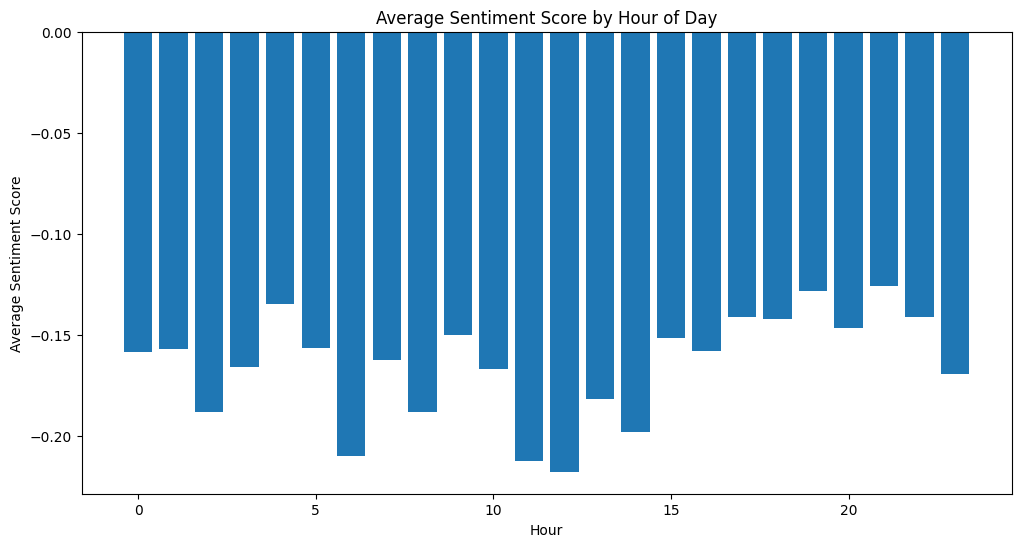

In [51]:
# Average sentiment score by hour of day
reddit_df['hour'] = pd.to_datetime(reddit_df['timestamp']).dt.hour
hourly_sentiment = reddit_df.groupby('hour')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(hourly_sentiment.index, hourly_sentiment.values)
plt.title('Average Sentiment Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Score')
plt.show()
